In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
averageNumberOfArrivalsPerUnitTime = 0.98
q = np.zeros(100000001)
q_ss = np.zeros(90000000) # steady-state queue sizes

In [3]:
# simulate 100,000,000 times, with q(0) = 0

for t in range(1, 100000001):
    a = np.random.poisson(averageNumberOfArrivalsPerUnitTime)
    #a = np.random.hypergeometric(19, 81, 5)
    #a = np.random.binomial(n = 10, p = 0.095)
    q[t] = max(q[t - 1] + a - 1, 0)
    if t > 10000000:
        q_ss[t - 10000000 - 1] = q[t]

Arrival Rate λ = 0.98
Service Rate μ = 1
Steady-state Average Queue Size ≈ 24.087


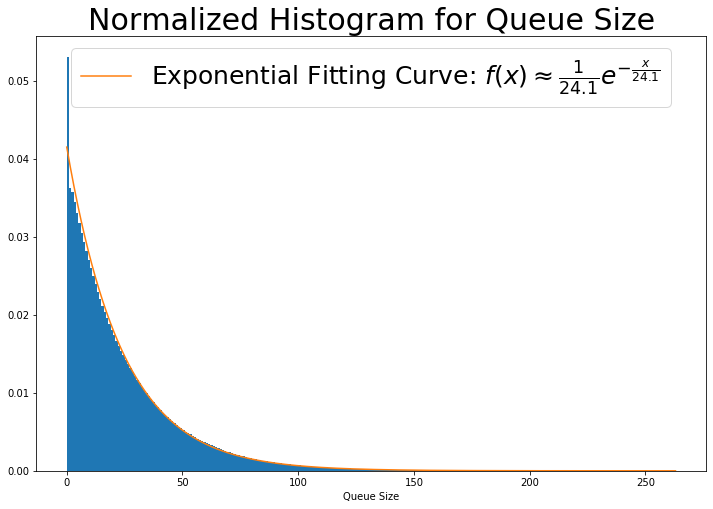

In [4]:
# output
    
print('Arrival Rate \u03BB =', averageNumberOfArrivalsPerUnitTime)
print('Service Rate \u03BC = 1')
print('Steady-state Average Queue Size \u2248', round(np.average(q_ss), 3))

plt.figure(figsize = (12, 8))

plt.hist(q_ss, bins = np.linspace(0, int(max(q_ss)) + 1, int(max(q_ss) + 2)), density = True)
plt.xlabel('Queue Size')
plt.title('Normalized Histogram for Queue Size', size = 30)

P = ss.expon.fit(q_ss)
beta = round(P[1], 1)
x = np.linspace(0, max(q_ss) + 1, 1000000)
y = ss.expon.pdf(x, *P)

plt.plot(x, y, label = r'Exponential Fitting Curve: $f(x) \approx \frac{1}{%(beta)s} e ^ {-\frac{x}{%(beta)s}}$' % locals())

plt.legend(prop = {'size': 25}, loc = 'upper center')
plt.show()